# Motivation Plots

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
def time_zone_cal(s):
    hour=int(s.split(':')[0])

    if 6<hour<=9:
        time_zone='Early_Morning'
    elif 9<hour<=12:
        time_zone='Morning'
    elif 12<hour<=17:
        time_zone='Afternoon'
    elif 17<hour<=23:
        time_zone='Evening'
    return time_zone


#reading Raw Data
def process_df(name):
    df=pd.read_csv(name)

    #calculating timeZone
    df['time_zone']=df.start_time.apply(time_zone_cal)

    columns=\
        ['time_zone','lat','long','stay_duration',
       'mfcc0', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'wifi_count',
       'edge_wifi_count', 'RSI', 'human_made', 'natural_land',
       'road_exist_percent', 'highly_populated_poi_exist', 'Is_Bus_stop',
       'Is_Turn', 'Is_Signal', 'Is_Congestion', 'Is_Adhoc']

    return df[columns].copy()

In [3]:
df=process_df("./DataSet/DataSet_54F_mfcc.csv")

In [4]:
def get_df_of_perticular_poi(bus=0,turn=0,signal=0,congestion=0,adhoc=0):
    return df[(df.Is_Bus_stop==bus)&(df.Is_Turn==turn)&(df.Is_Signal==signal)&(df.Is_Congestion==congestion)&(df.Is_Adhoc==adhoc)]

In [5]:
def get_df_by_timezone(dataframe,timezone):
    return dataframe[dataframe.time_zone==timezone]

In [6]:
pois={'bus':[1,0,0,0,0],
      'turn':[0,1,0,0,0],
      'signal':[0,0,1,0,0],
      'congestion':[0,0,0,1,0],
      'adhoc':[0,0,0,0,1]}

timezones=['Early_Morning','Morning','Afternoon','Evening']

In [7]:
l=[]
for poi in pois.keys():
    l_row=[poi]
    for tz in timezones:
        l_row.append(get_df_by_timezone(get_df_of_perticular_poi(*pois[poi]),tz).shape[0])
    l.append(l_row)

In [8]:
pd.DataFrame(l,columns=['POI',*timezones])

,POI,Early_Morning,Morning,Afternoon,Evening
0,bus,140,215,216,124
1,turn,78,129,92,66
2,signal,15,15,15,6
3,congestion,6,120,221,90
4,adhoc,253,433,409,219


# plot1:1. stay duration ar poi wise time wise dist box

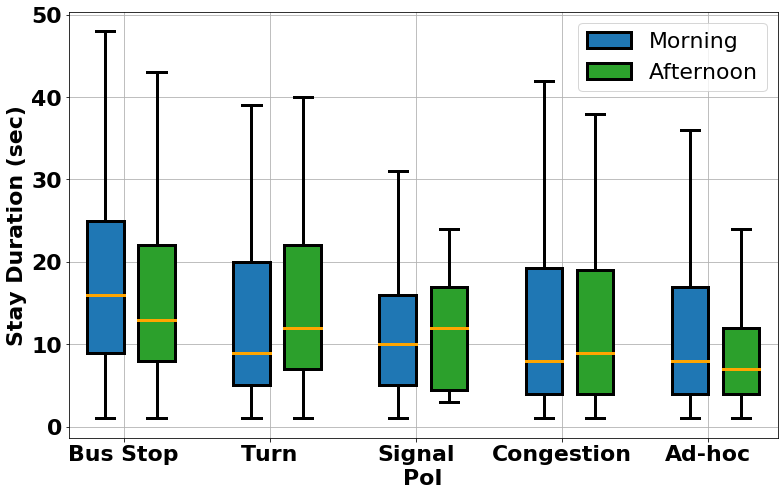

In [9]:
fig, ax = plt.subplots(figsize=(11,7))

pos=[1,3,5,7,9]
sep=0.7

bp1=\
ax.boxplot([get_df_by_timezone(get_df_of_perticular_poi(bus=1),'Morning').stay_duration.values,
             get_df_by_timezone(get_df_of_perticular_poi(turn=1),'Morning').stay_duration.values,
             get_df_by_timezone(get_df_of_perticular_poi(signal=1),'Morning').stay_duration.values,
             get_df_by_timezone(get_df_of_perticular_poi(congestion=1),'Morning').stay_duration.values,
             get_df_by_timezone(get_df_of_perticular_poi(adhoc=1),'Morning').stay_duration.values
            ],
            positions=pos,
            showfliers=False,notch=False,patch_artist=True, boxprops=dict(linewidth=3.0,color='black',facecolor="C0"),
            whiskerprops = dict(linestyle='-',linewidth=3.0, color='black'),
            capprops=dict(linestyle='-',linewidth=3.0, color='black'),
            medianprops=dict(linestyle='-',linewidth=3.0, color='orange')
          )
bp2=\
ax.boxplot([get_df_by_timezone(get_df_of_perticular_poi(bus=1),'Afternoon').stay_duration.values,
             get_df_by_timezone(get_df_of_perticular_poi(turn=1),'Afternoon').stay_duration.values,
             get_df_by_timezone(get_df_of_perticular_poi(signal=1),'Afternoon').stay_duration.values,
             get_df_by_timezone(get_df_of_perticular_poi(congestion=1),'Afternoon').stay_duration.values,
             get_df_by_timezone(get_df_of_perticular_poi(adhoc=1),'Afternoon').stay_duration.values
            ],
            positions=[e+sep for e in pos],
            showfliers=False,notch=False,patch_artist=True, boxprops=dict(linewidth=3.0,color='black',facecolor="C2"),
            whiskerprops = dict(linestyle='-',linewidth=3.0, color='black'),
            capprops=dict(linestyle='-',linewidth=3.0, color='black'),
            medianprops=dict(linestyle='-',linewidth=3.0, color='orange')
          )

ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ['Morning', 'Afternoon'],fontsize=22,loc='upper right')

ax.set_xlabel("PoI",fontsize=22, fontweight='bold')
ax.set_ylabel("Stay Duration (sec)",fontsize=22, fontweight='bold')

ax.set_xticks([1.25,3.25,5.25,7.25,9.25])
ax.set_xticklabels(['Bus Stop','Turn','Signal','Congestion','Ad-hoc'],fontsize=22, fontweight='bold')
plt.yticks(fontsize=22, fontweight='bold')
plt.tight_layout()
plt.grid()

In [10]:
fig.savefig("./plots/POI_and_TZ_wise_box_of_stay_Duration.png")

# plot2:2. wifi error bar char pr poi

In [11]:
wifi_means=\
[get_df_of_perticular_poi(bus=1).wifi_count.mean(),
 get_df_of_perticular_poi(turn=1).wifi_count.mean(),
 get_df_of_perticular_poi(signal=1).wifi_count.mean(),
 get_df_of_perticular_poi(congestion=1).wifi_count.mean(),
 get_df_of_perticular_poi(adhoc=1).wifi_count.mean()]

wifi_stds=\
[get_df_of_perticular_poi(bus=1).wifi_count.std(),
 get_df_of_perticular_poi(turn=1).wifi_count.std(),
 get_df_of_perticular_poi(signal=1).wifi_count.std(),
 get_df_of_perticular_poi(congestion=1).wifi_count.std(),
 get_df_of_perticular_poi(adhoc=1).wifi_count.std()]

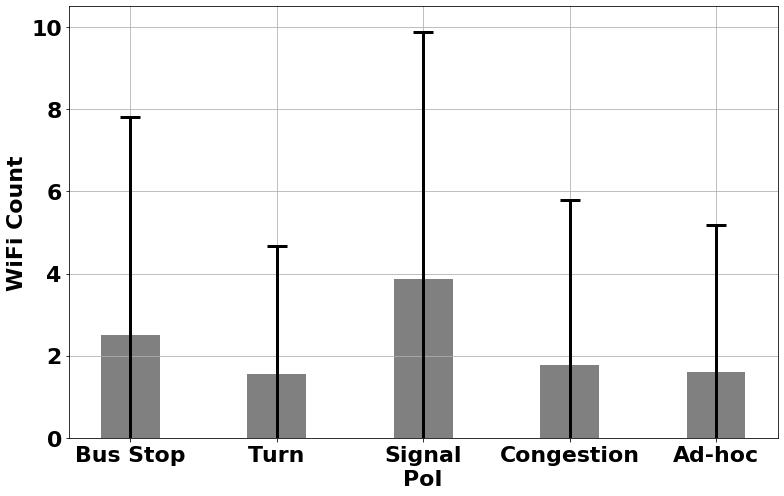

In [12]:
fig, ax = plt.subplots(figsize=(11,7))
ax.bar(x=[1,3,5,7,9],height=wifi_means,yerr=wifi_stds,align='center', alpha=1, ecolor='k', capsize=10,color='grey',
      error_kw =dict(linestyle='-',linewidth=3.0, color='black',markeredgewidth=3))
ax.set_ylim(0)

ax.set_xlabel("PoI",fontsize=22, fontweight='bold')
ax.set_ylabel("WiFi Count",fontsize=22, fontweight='bold')

ax.set_xticks([1,3,5,7,9])
ax.set_xticklabels(['Bus Stop','Turn','Signal','Congestion','Ad-hoc'],fontsize=22, fontweight='bold')
plt.yticks(fontsize=22, fontweight='bold')
plt.tight_layout()
plt.grid()

In [13]:
fig.savefig("./plots/POI_wise_Wifi_count_error_barplot.png")

In [14]:
#NICE

# plot 3. Wifi Boxlplot

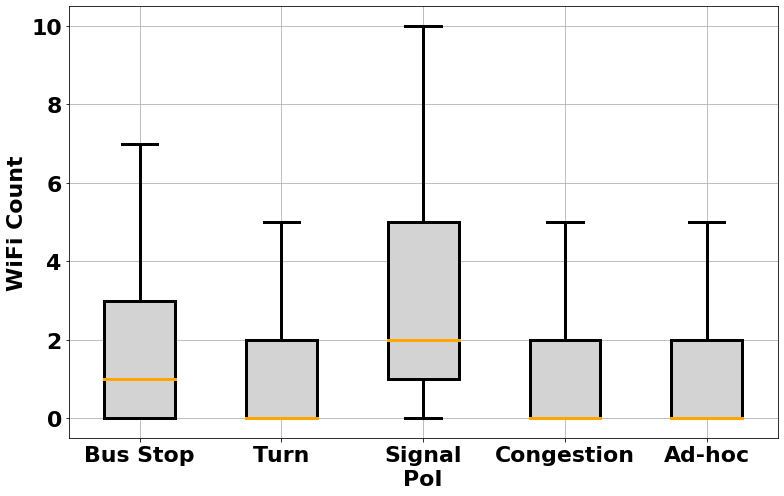

In [15]:
fig, ax = plt.subplots(figsize=(11,7))

pos=[1,2,3,4,5]
sep=0.7

bp1=\
ax.boxplot([get_df_of_perticular_poi(bus=1).wifi_count,
            get_df_of_perticular_poi(turn=1).wifi_count,
            get_df_of_perticular_poi(signal=1).wifi_count,
            get_df_of_perticular_poi(congestion=1).wifi_count,
            get_df_of_perticular_poi(adhoc=1).wifi_count],
            positions=pos,
            showfliers=False,notch=False,patch_artist=True, boxprops=dict(linewidth=3.0,color='black',facecolor="lightgrey"),
            whiskerprops = dict(linestyle='-',linewidth=3.0, color='black'),
            capprops=dict(linestyle='-',linewidth=3.0, color='black'),
            medianprops=dict(linestyle='-',linewidth=3.0, color='orange')
          )

ax.set_xlabel("PoI",fontsize=22, fontweight='bold')
ax.set_ylabel("WiFi Count",fontsize=22, fontweight='bold')

ax.set_xticks([1,2,3,4,5])
ax.set_xticklabels(['Bus Stop','Turn','Signal','Congestion','Ad-hoc'],fontsize=22, fontweight='bold')
plt.yticks(fontsize=22, fontweight='bold')
plt.tight_layout()
plt.grid()

In [16]:
fig.savefig("./plots/POI_wise_Wifi_count_boxplot.png")

# plot 4. PIE Chart of available data over timeZones

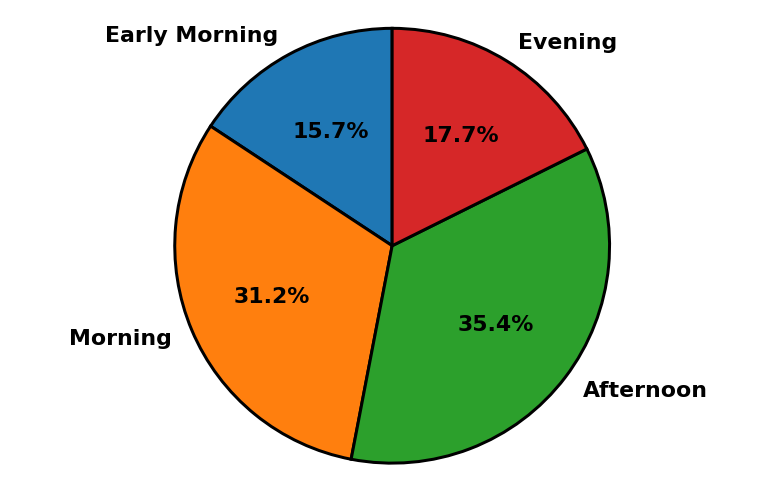

In [17]:
tz_df=df.time_zone.value_counts()[['Early_Morning','Morning','Afternoon','Evening']]

fig, ax = plt.subplots(figsize=(11,7))
ax.pie(x=tz_df.values,wedgeprops={"edgecolor":"black",'linewidth': 3,'linestyle': 'solid', 'antialiased': True},autopct='%1.1f%%', startangle=90,labels=['Early Morning','Morning','Afternoon','Evening'],textprops={'fontsize': 22,'fontweight':'bold'})
plt.tight_layout()
plt.axis('equal')
plt.show()

In [18]:
fig.savefig("./plots/TZ_wise_data_dist.png")

# plot 5 Edge Wifi boxplot

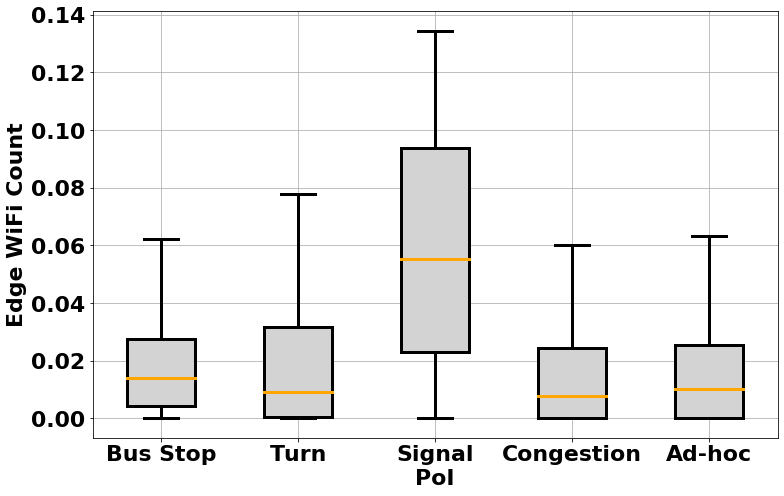

In [19]:
fig, ax = plt.subplots(figsize=(11,7))

pos=[1,2,3,4,5]
sep=0.7

bp1=\
ax.boxplot([get_df_of_perticular_poi(bus=1).edge_wifi_count,
            get_df_of_perticular_poi(turn=1).edge_wifi_count,
            get_df_of_perticular_poi(signal=1).edge_wifi_count,
            get_df_of_perticular_poi(congestion=1).edge_wifi_count,
            get_df_of_perticular_poi(adhoc=1).edge_wifi_count],
            positions=pos,
            showfliers=False,notch=False,patch_artist=True, boxprops=dict(linewidth=3.0,color='black',facecolor="lightgrey"),
            whiskerprops = dict(linestyle='-',linewidth=3.0, color='black'),
            capprops=dict(linestyle='-',linewidth=3.0, color='black'),
            medianprops=dict(linestyle='-',linewidth=3.0, color='orange')
          )

ax.set_xlabel("PoI",fontsize=22, fontweight='bold')
ax.set_ylabel("Edge WiFi Count",fontsize=22, fontweight='bold')

ax.set_xticks([1,2,3,4,5])
ax.set_xticklabels(['Bus Stop','Turn','Signal','Congestion','Ad-hoc'],fontsize=22, fontweight='bold')
plt.yticks(fontsize=22, fontweight='bold')
plt.tight_layout()
plt.grid()

In [20]:
fig.savefig("./plots/POI_wise_edge_Wifi_count_boxplot.png")

# Saving only Bus Stop, Turn, COngestion, Signal, Adhoc datasets with wifi_counts

In [21]:
get_df_of_perticular_poi(bus=1)[['lat','long','wifi_count','Is_Bus_stop']].to_csv("./DataSet/Bus_wifi.csv",index=False)
get_df_of_perticular_poi(turn=1)[['lat','long','wifi_count','Is_Turn']].to_csv("./DataSet/Turn_wifi.csv",index=False)
get_df_of_perticular_poi(signal=1)[['lat','long','wifi_count','Is_Signal']].to_csv("./DataSet/Signal_wifi.csv",index=False)
get_df_of_perticular_poi(congestion=1)[['lat','long','wifi_count','Is_Congestion']].to_csv("./DataSet/Congestion_wifi.csv",index=False)
get_df_of_perticular_poi(adhoc=1)[['lat','long','wifi_count','Is_Adhoc']].to_csv("./DataSet/Adhoc_wifi.csv",index=False)

In [22]:
#DONE